In [3]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# K Means

## 1. Explore

## 2. Build Model

In [4]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


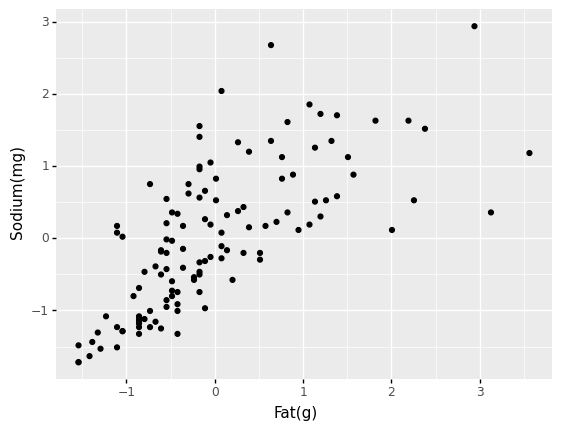

<ggplot: (8761596462511)>

In [5]:
#build the clustering model
features = ["Fat(g)", "Sodium(mg)"]

X = bk[features] #features we are clustering on 

#z-score both of our variables, assuming w k-means that we have spherical variance
#   our features need to have relatively the same scale to have relatively the same spread
z = StandardScaler()

#keeps our data frame but replaces the columns w their z-scored versions
X[["Fat(g)", "Sodium(mg)"]] = z.fit_transform(X) #does both the fit and the transform at the same time


(ggplot(X, aes("Fat(g)", "Sodium(mg)")) + geom_point())

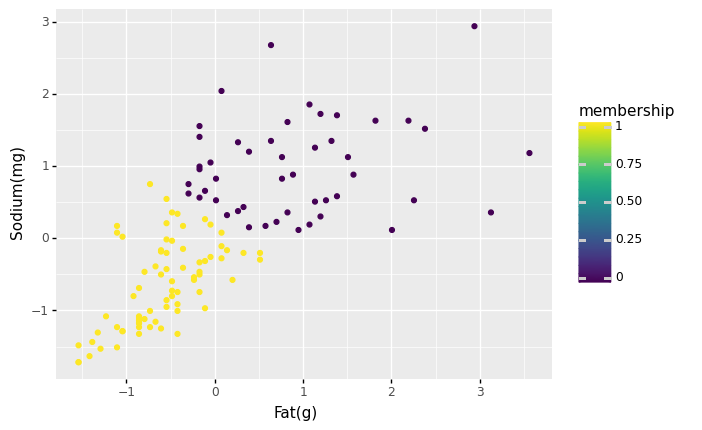

<ggplot: (8761596462409)>

In [6]:
km = KMeans(n_clusters = 2)
km.fit(X)

membership = km.predict(X) #what class did you put each of our data points in?

#add that to our data frame
X["cluster"] = membership

#locate which data points is in which cluster
(ggplot(X, aes("Fat(g)", "Sodium(mg)", color = "membership")) + geom_point())

## 3. Evaluate Model

In [7]:
# give it input data and the membership
silhouette_score(X[features], membership)

#score near 1 is great, clusters are cohesive and separable 

0.4888133809282478

# Another Example

In [8]:
# an example with a bunch of different features (variables)

# grab the variables we're using to predict
features = ["Fat(g)", "Sodium(mg)", "Calories", "Chol(mg)", "Sugar(g)", "Protein(g)"]
X = bk[features]

# z-score the variables
z = StandardScaler()
X[features] = z.fit_transform(X)

# create and fit the model, predict the clusters the data points are in
km = KMeans(n_clusters = 5)
km.fit(X)

# identify the clusters the data points are in
membership = km.predict(X)

# add clusters to the data frame
X["cluster"] = membership


# how did the model do?
silhouette_score(X[features], membership)

0.28495780856976133

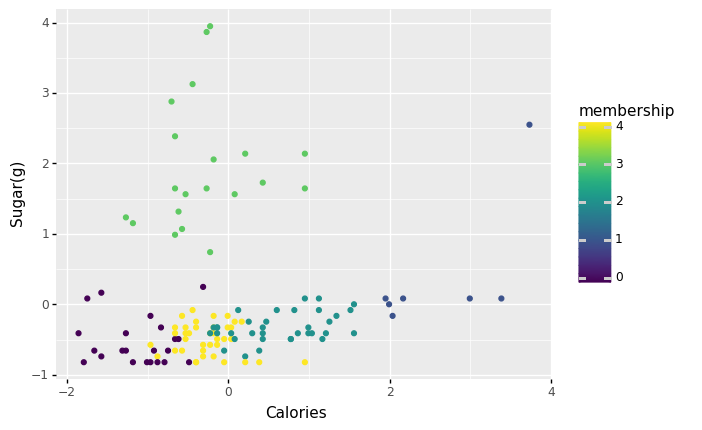

<ggplot: (8761596697468)>

In [9]:
# visualize the data and model (note that it is hard to visualize more than 2 variables, more than 2 dimensions)
(ggplot(X, aes("Calories", "Sugar(g)", color = "membership")) + geom_point())